In [53]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from IPython import display
import matplotlib.pyplot as plt

In [4]:
display.set_matplotlib_formats('svg')

In [5]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root= '../data', train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root= '../data', train=False, transform=trans, download=True)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
mnist_train

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: ../data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [8]:
mnist_test

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: ../data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [16]:
len(mnist_train[0][0][0][0])

28

In [17]:
def get_fashion_mnist_label(labels):
  text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt',
        'sneaker', 'bag', 'ankle boot']
  return [text_labels[int(i)] for i in labels]

In [45]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
  _, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5))
  axes = axes.flatten()
  for i, (ax, img) in enumerate(zip(axes, imgs)):
    if torch.is_tensor(img):
      ax.imshow(img.numpy())
    else:
      ax.imshow(img)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    if titles:
      ax.set_title(titles[i])
  return axes

In [22]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f72c17d6050>,
      dtype=object)

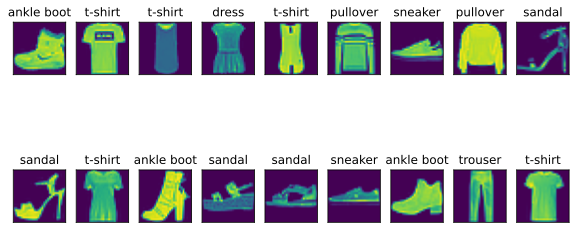

In [46]:
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_label(y), scale=1.5)

In [47]:
batch_size = 256

def get_workers():
  return 4

train_iter = data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=get_workers())

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [48]:
import time
start = time.time()
for X, y in train_iter:
  continue
print(time.time()-start)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


4.721619129180908


In [51]:
def load_data_fashion_mnist(batch_size, resize=None):
  trans=[transforms.ToTensor()]
  if resize:
    trans.insert(0, transforms.Resize(resize))
  trans = transforms.Compose(trans)
  mnist_train = torchvision.datasets.FashionMNIST(root="../data",
                                                    train=True,
                                                    transform=trans,
                                                    download=True)
  mnist_test = torchvision.datasets.FashionMNIST(root="../data",
                                                   train=False,
                                                   transform=trans,
                                                   download=True)
  return (data.DataLoader(mnist_train, batch_size, shuffle=True,
                            num_workers=get_workers()),
          data.DataLoader(mnist_test, batch_size, shuffle=False,
                            num_workers=get_workers()))

In [52]:
batch_size = 256
train_iter, test_iter = load_data_fashion_mnist(batch_size=batch_size)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [108]:
num_inputs = 784
num_outputs = 10

w = torch.normal(0, 0.01, size=(num_inputs, num_outputs), requires_grad=True)
b = torch.zeros(num_outputs, requires_grad=True)

In [56]:
def softmax(X):
  X_exp = torch.exp(X)
  sum_ex = X_exp.sum(1, keepdim=True)
  return X_exp / sum_ex

In [57]:
def net(X):
  return softmax(torch.matmul(X.reshape(-1, 784), w) + b)

In [58]:
y = torch.tensor([0, 2])
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [59]:
def entropy_loss(y_hat, y):
  return -torch.log(y_hat[range(len(y_hat)), y])

In [65]:
y = torch.normal(0, 1, size=(5,5))
print(y)
print(y.argmax(axis=1))
print(len(y.shape))

tensor([[-1.8999, -0.1090, -0.7387,  1.0898,  0.0487],
        [ 0.8670,  0.2134, -1.0593,  0.1827, -1.4002],
        [ 1.0595, -1.8234, -0.4627, -1.9876,  1.0661],
        [-0.2794,  0.4364,  0.2378,  0.5752,  1.5078],
        [-0.1254,  0.0483, -0.8528,  0.0986, -0.3089]])
tensor([3, 0, 4, 4, 3])
2


In [66]:
def accuracy(y_hat, y):
  if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
    y_hat = y_hat.argmax(axis=1)
  cmp = y_hat.type(y.dtype) == y
  return float(cmp.type(y.dtype).sum())

In [127]:
!pip install d2l

     |████████████████████████████████| 83 kB 1.2 MB/s 


In [130]:
from d2l import torch as d2l


In [125]:
def evaluate_accuracy(net, data_iter):
  if isinstance(net, torch.nn.Module):
    net.eval()
  metric = Accumulator(2)
  with torch.no_grad():
    for X, y in train_iter:
      metric.add(accuracy(net(X), y), y.numel())
  return metric[0] / metric[1]

In [123]:
class Accumulator:
  def __init__(self, n):
    self.data = [0.0] * n
  def add(self, *args):
    self.data = [a + float(b) for a, b in zip(self.data, args)] # a: self.data, b args, a[0]+b[0] -> no predition, a[1]+b[1] no el
  def reset(self):
    self.data = [0.0] * len(self.data)
  def __getitem__(self, idx):
    return self.data[idx]

In [131]:
def train_epoch_ch3(net, train_iter, test_iter, loss, updater):
  if isinstance(net, torch.nn.Module):
    net.train()
  metric = Accumulator(3)
  for X, y in train_iter:
    y_hat = net(X)
    l = loss(y_hat, y)
    if isinstance(updater, torch.optim.Optimizer):
      updater.zero_grad()
      l.backward()
      updater.step()
      print(f'1, loss: {float(l)*len(y)}')
      metric.add(float(l)*len(y), accuracy(y_hat, y), y.numel())
    else:
      l.sum().backward()
      updater(X.shape[0])
      print(f'2, l.sum.shape: {l.sum()}')
      metric.add(float(l.sum()), accuracy(y_hat, y), y.numel())
  return metric[0] / metric[2], metric[1] / metric[2]


In [128]:
class Animator:
  def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None, ylim=None, xscale='linear', yscale='linear',fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
    if legend is None:
      legend = []
    display.set_matplotlib_formats('svg')
    self.fig, self.axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize)
    if nrows * ncols == 1:
      self.axes = [self.axes,]
    self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
    self.X, self.Y, self.fmts = None, None, fmts
  def add(self, x, y):
        # Add multiple data points into the figure
    if not hasattr(y, "__len__"):
            y = [y]
    n = len(y)
    if not hasattr(x, "__len__"):
        x = [x] * n
    if not self.X:
        self.X = [[] for _ in range(n)]
    if not self.Y:
        self.Y = [[] for _ in range(n)]
    for i, (a, b) in enumerate(zip(x, y)):
        if a is not None and b is not None:
            self.X[i].append(a)
            self.Y[i].append(b)
    self.axes[0].cla()
    for x, y, fmt in zip(self.X, self.Y, self.fmts):
        self.axes[0].plot(x, y, fmt)
    self.config_axes()
    display.display(self.fig)
    display.clear_output(wait=True)

In [116]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):
  animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
  for epoch in range(num_epochs):
    train_metrics = train_epoch_ch3(net, train_iter, test_iter, loss, updater)
    test_acc = evaluate_accuracy(net, test_iter)
    animator.add(epoch + 1, train_metrics + (test_acc,))
  train_loss, train_acc = train_metrics
  assert train_loss < 0.5, train_loss
  assert train_acc <= 1 and train_acc > 0.7, train_acc
  assert test_acc <= 1 and test_acc > 0.7, test_acc

In [117]:
lr = 0.1

def SGD(params, lr, batch_size):
  with torch.no_grad(): # set up for reduce bo nho
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_() # must set_up 

def updater(batch_size):
    return SGD([w, b], lr, batch_size)

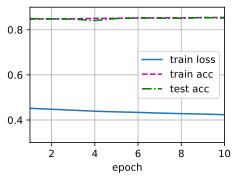

In [132]:
num_epochs = 10
train_ch3(net, train_iter, test_iter, entropy_loss, num_epochs, updater)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


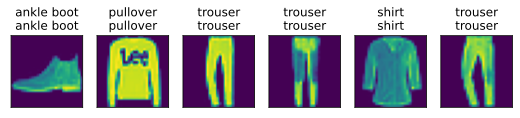

In [139]:
def predict_ch3(net, test_iter, n=6):  
    """Predict labels (defined in Chapter 3)."""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))

    titles = [true + '\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)